In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
import mcu
import swiss_roll_dataset_generator as roll_gen
import dataset_generator


/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


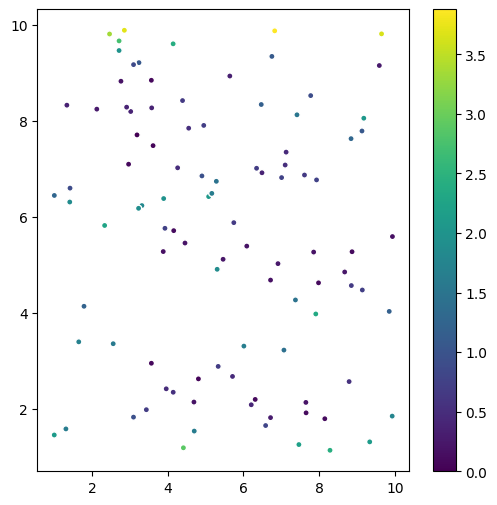

0.07927692032228585


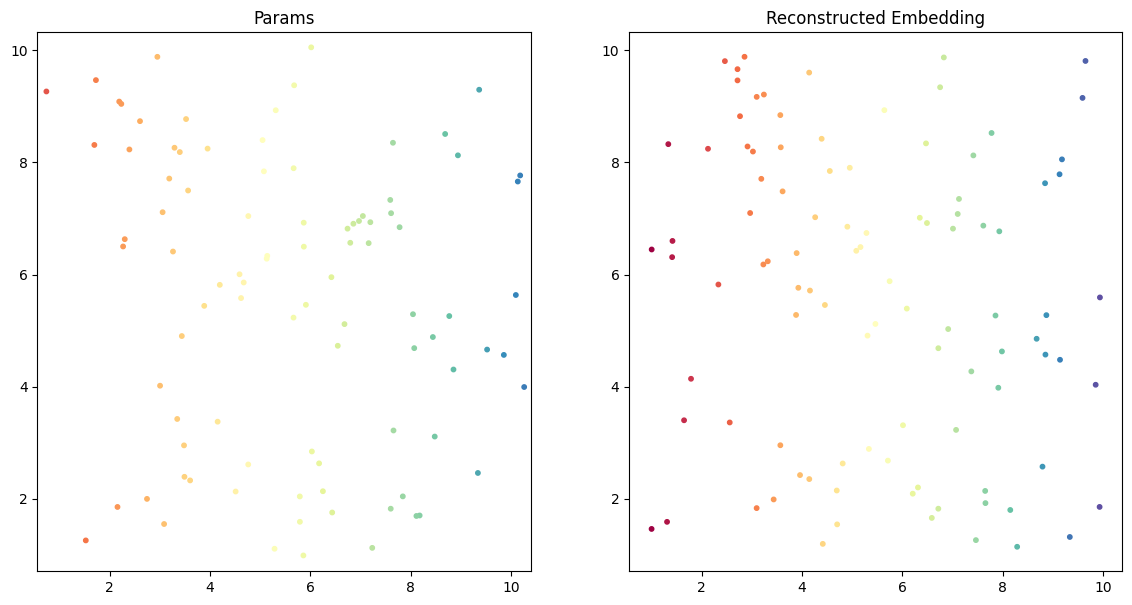

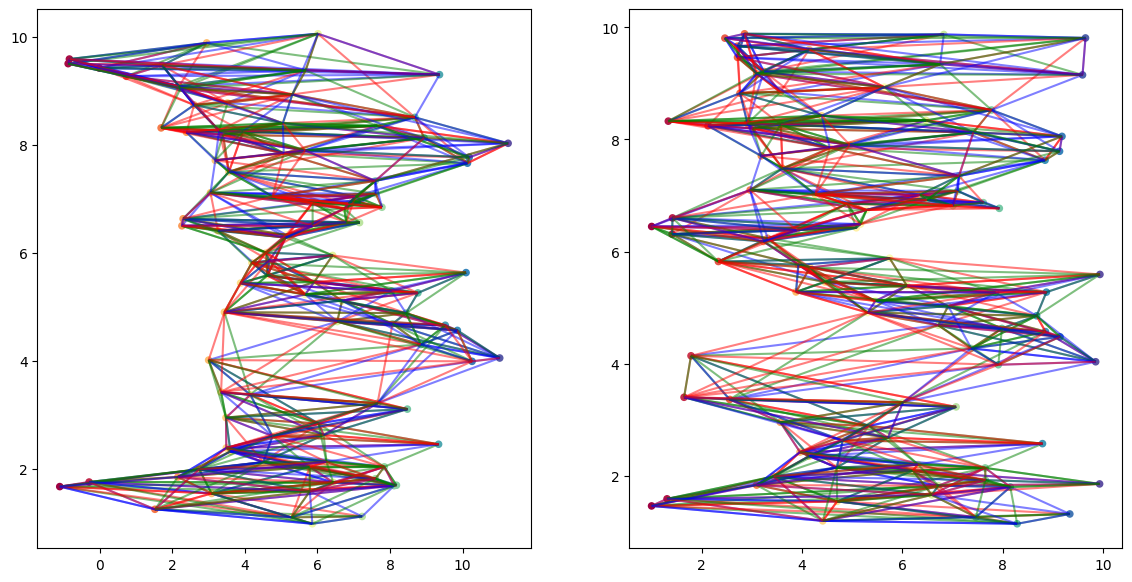

In [17]:
figure_num = 100
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level=0
lw = [1, 1]
up = [10, 10]
param_names = ["c1", "c2"]
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
# control_vars = np.array([[1, 1], [1, 1],[1, 1], [1, 1], [1, 1],[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
figures = dataset_generator.generate_array_of_figures(control_vars, roll_gen.generate_swiss_roll, noise_level=noise_level, min_num_points=figure_point_cnt)
k = 6
c = 1e5
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, figures, k)

q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)


0.07927692032228585


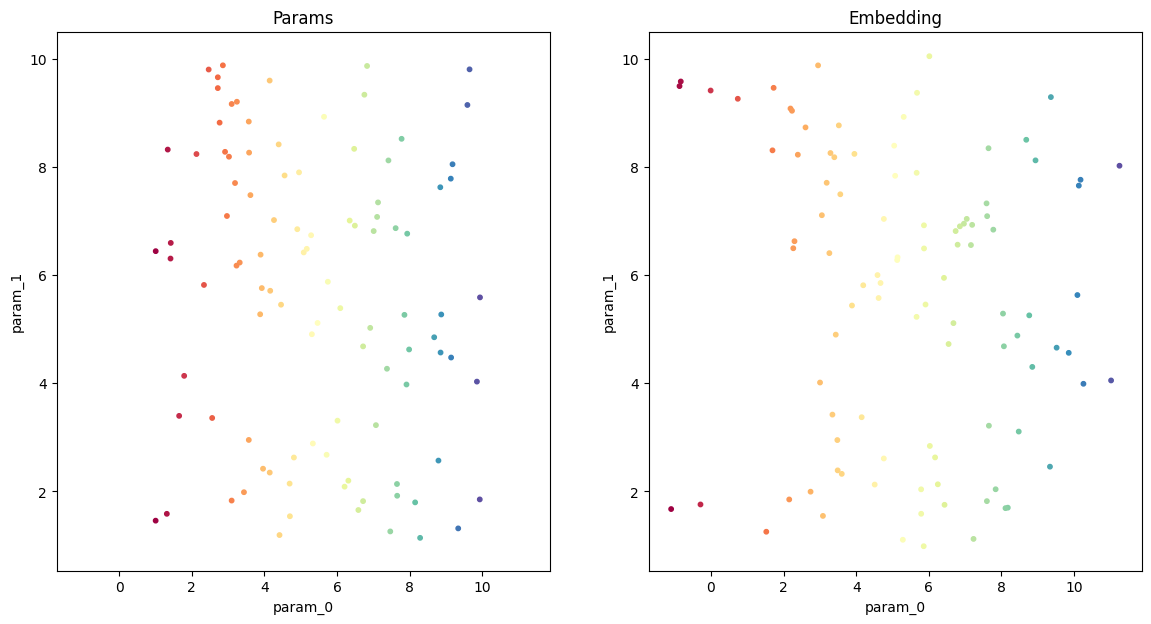

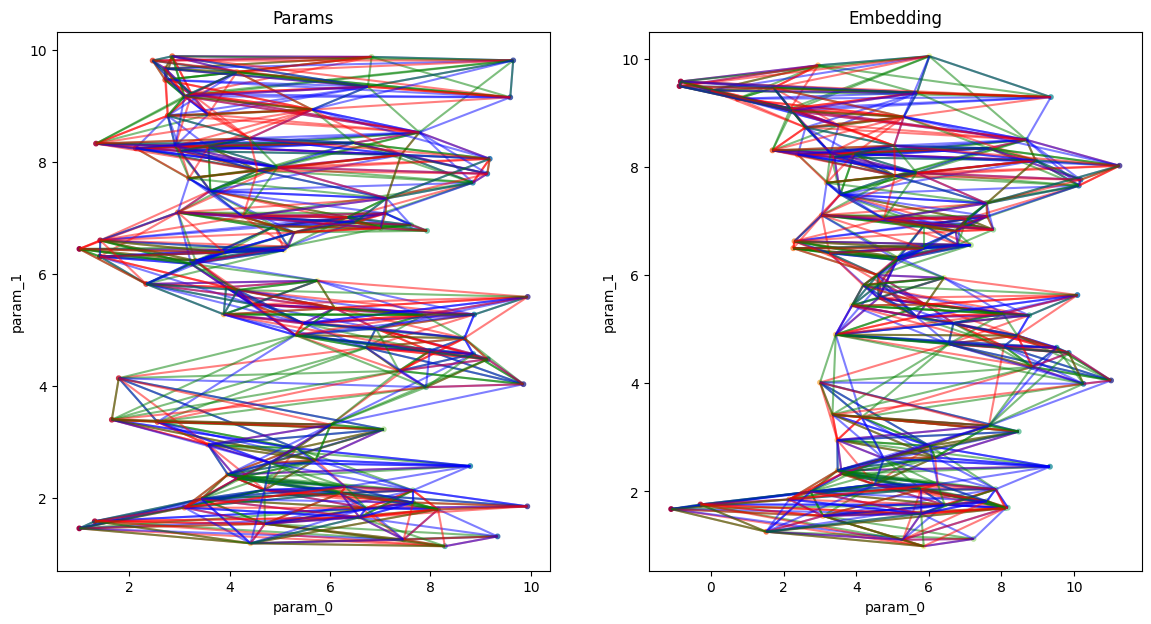

In [24]:
ld_embedding = mcu.reduce_dimensions(q, p)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, control_vars)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars)
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, edges=edges)

-----------
x_opt  = [2.27201845 2.17253298], x_err = 2143.224366134636
x_real = [1.04336527 1.52265376]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 2287.555370061143
x_real = [1.61952947 1.42127894]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 2394.0741169851713
x_real = [1.59387064 1.14301479]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1924.2668192217031
x_real = [1.57715989 1.59721132]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 2307.811583484
x_real = [1.2345519 1.4120293]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1493.2090326754
x_real = [1.2509016  1.67602621]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 2061.296937199071
x_real = [1.49987769 1.5664949 ]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 2376.3841839054935
x_real = [1.62238895 1.16532404]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 2372.4978755352736
x_real = [1.43029051 1.13003607]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 2249

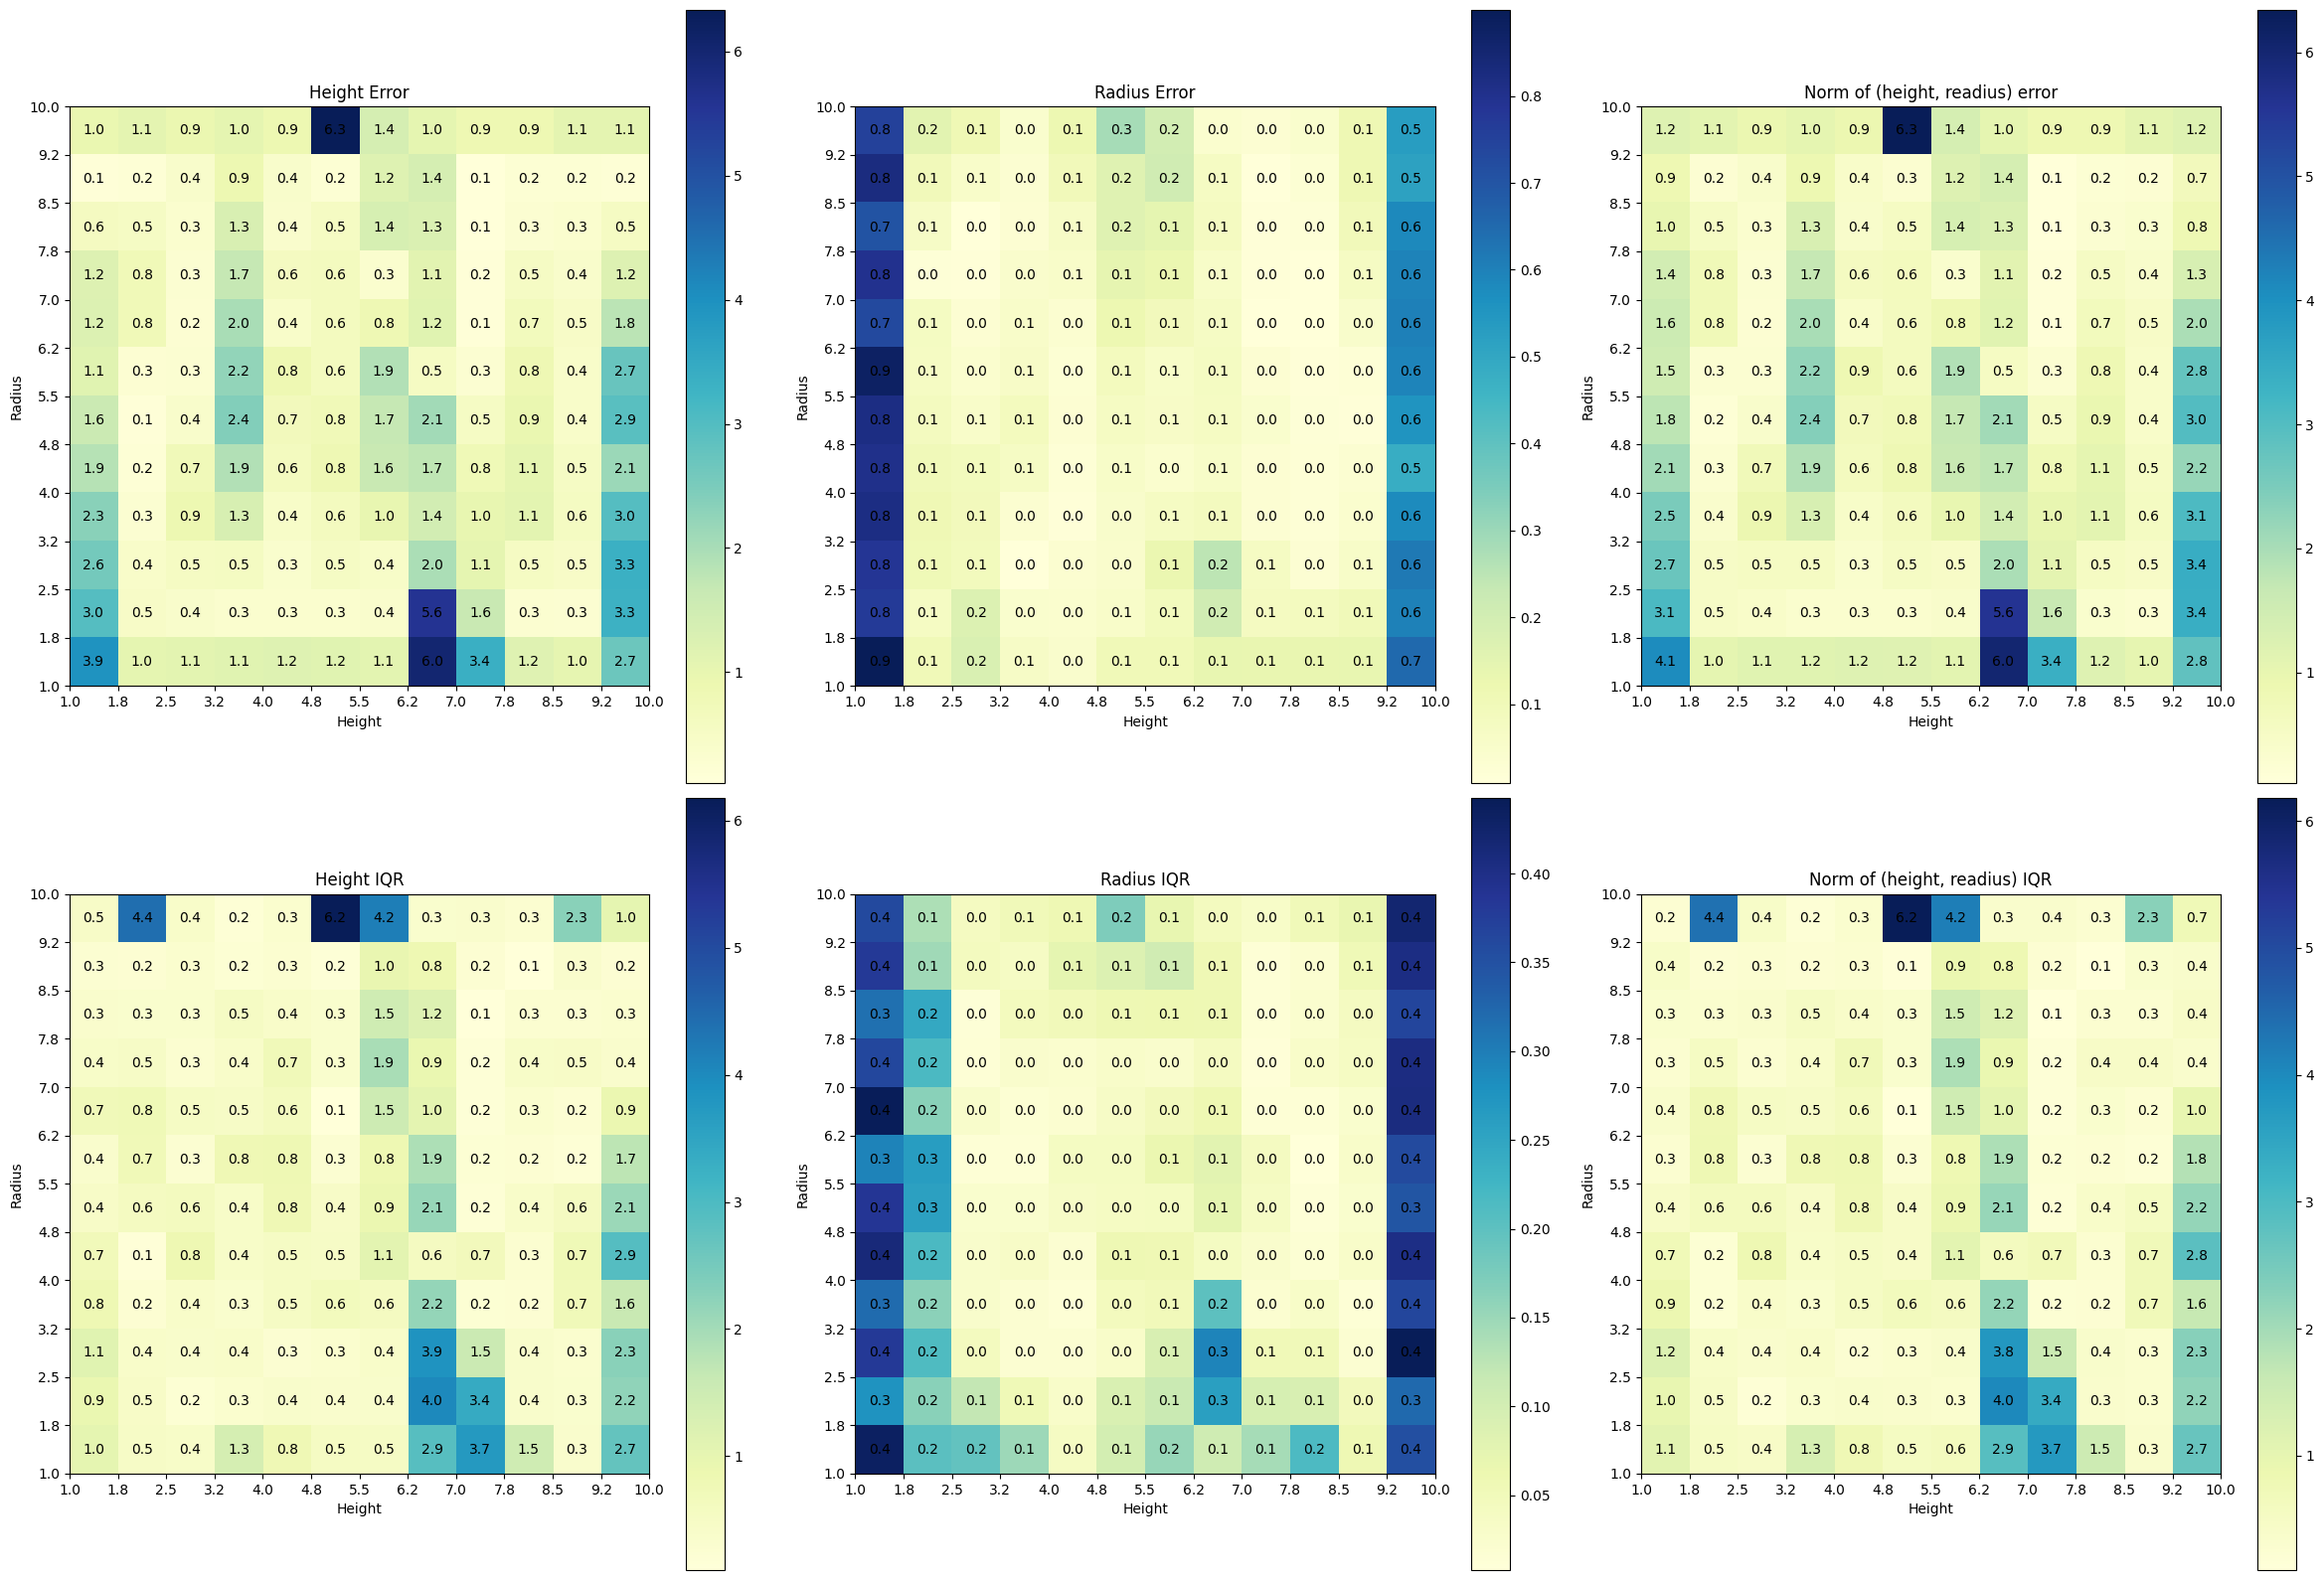

In [22]:
pieces_cnt = 12
test_data_size = 50
noise_level = 0
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, roll_gen.generate_swiss_roll, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = False)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)

-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3708669172165
x_real = [1.75 1.75]
-----------
x_opt  = [2.27201845 2.17253298], x_err = 1107.3

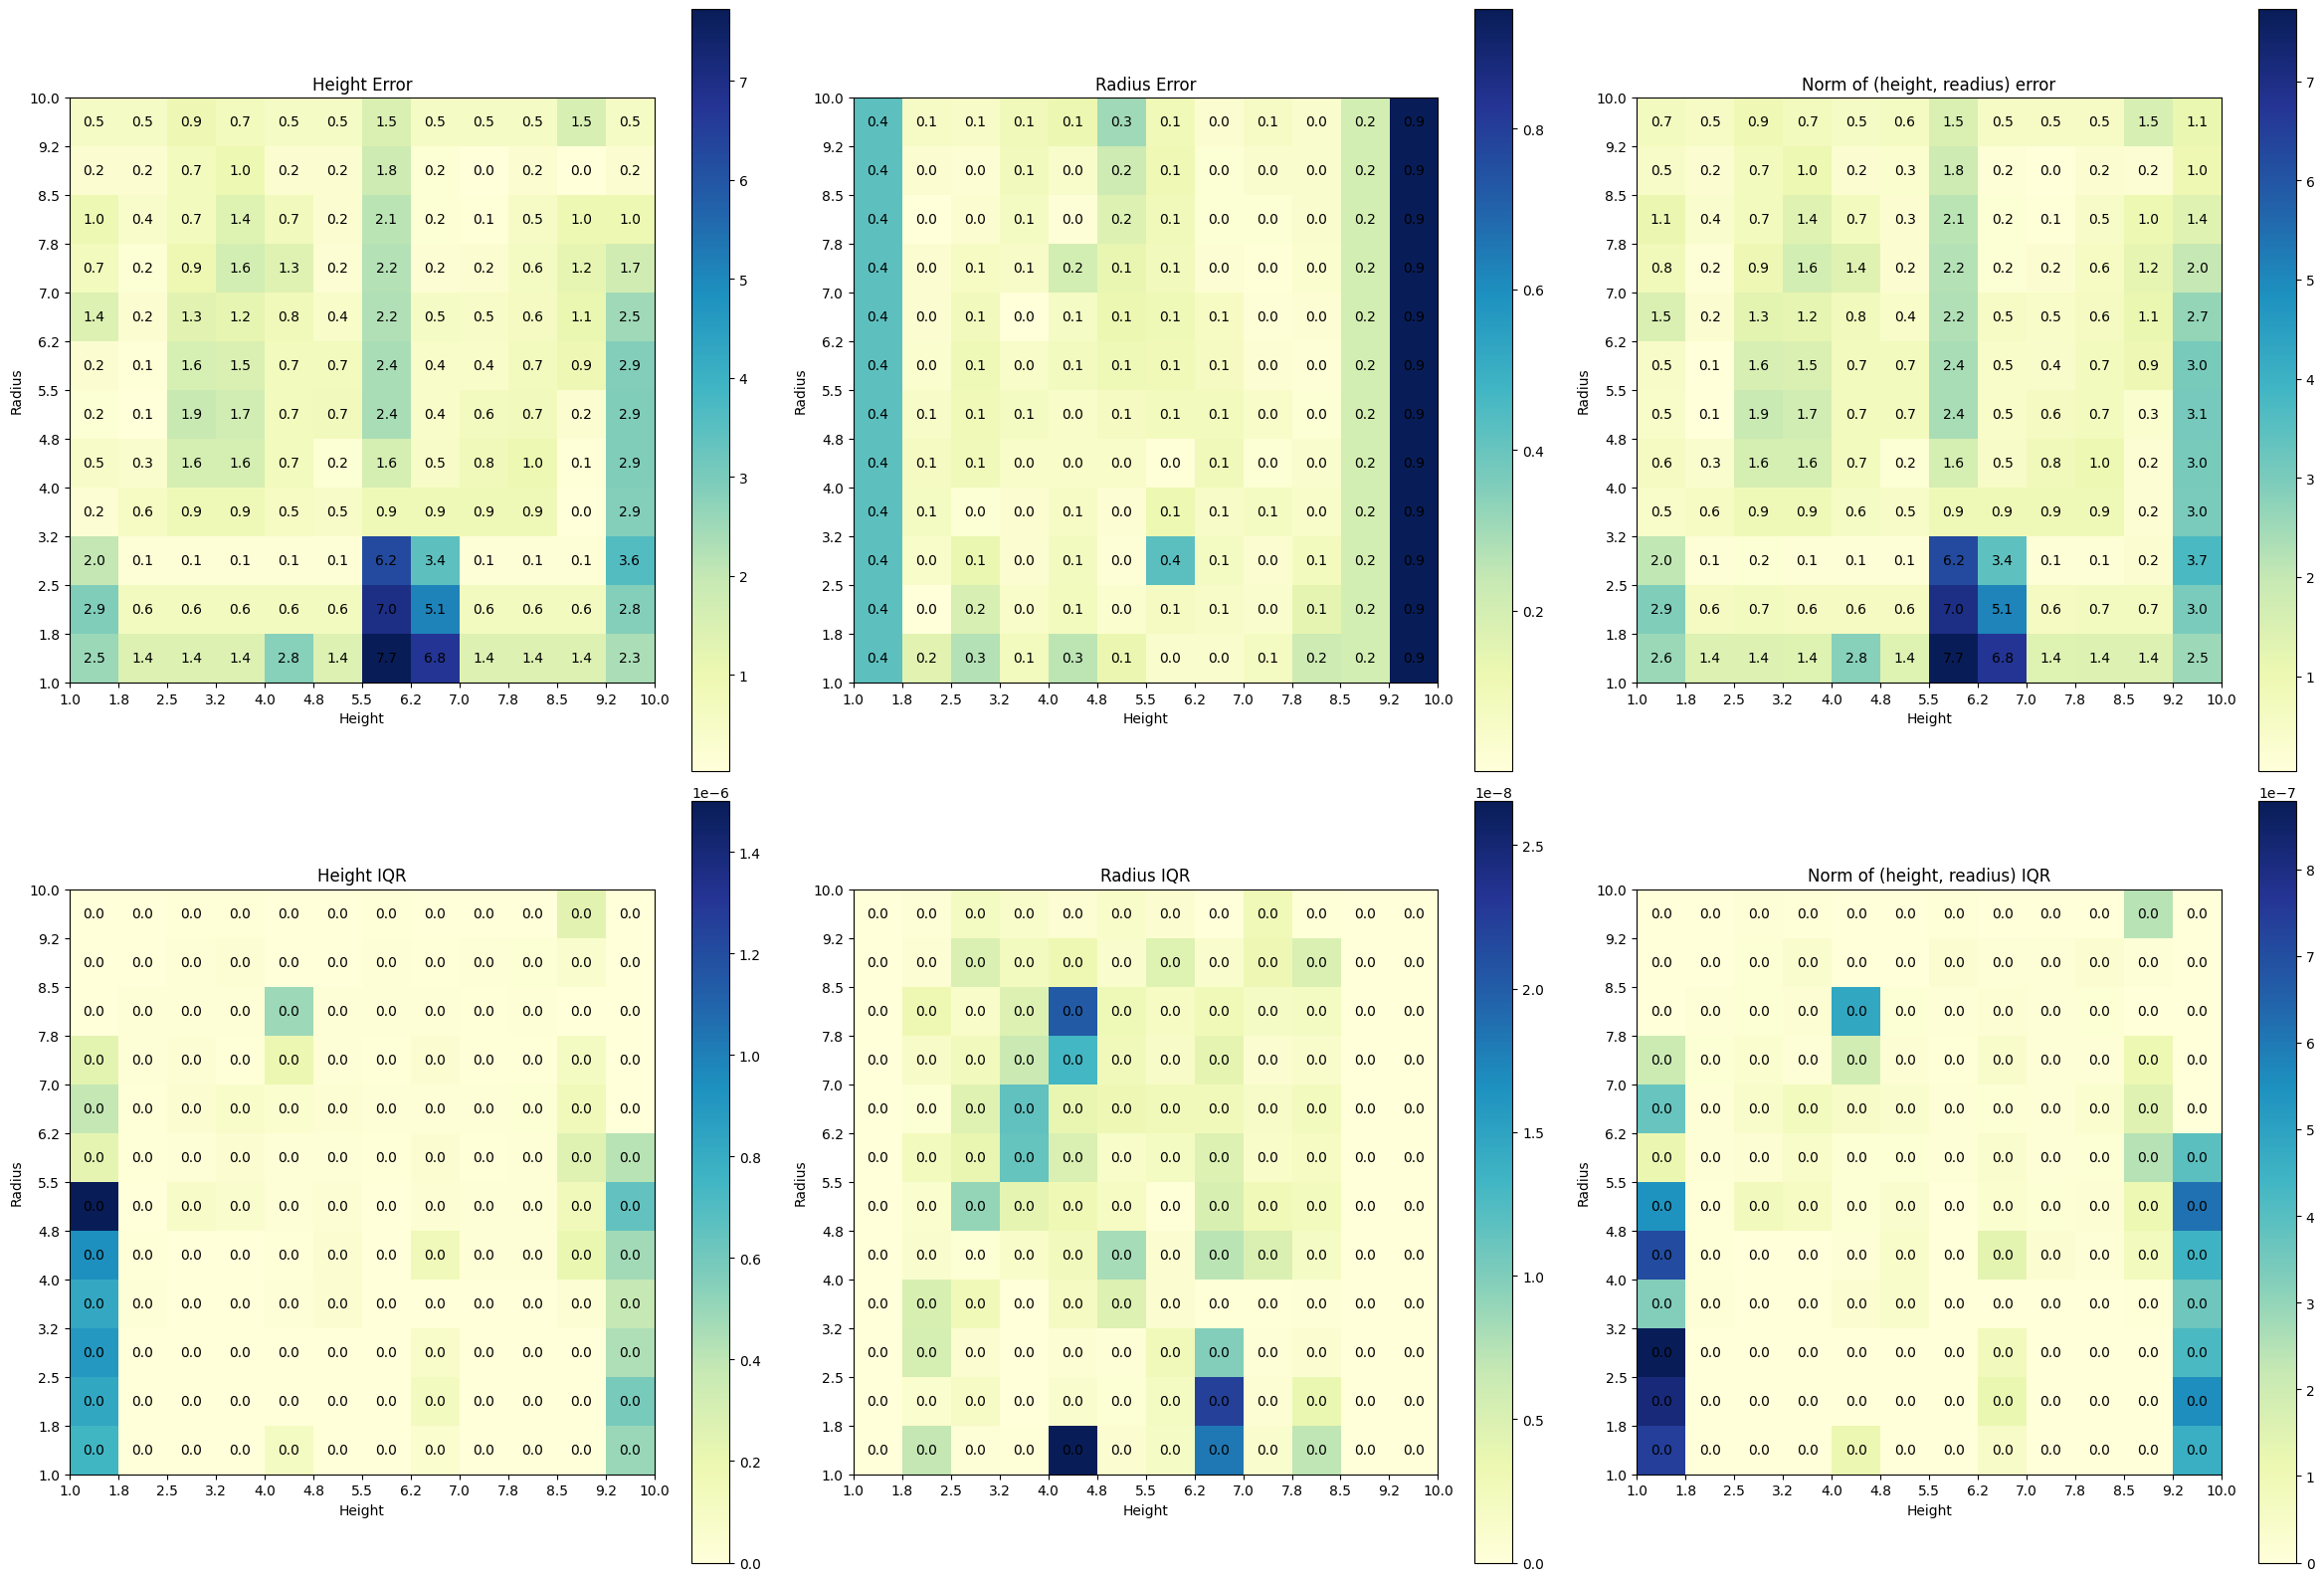

In [23]:
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, roll_gen.generate_swiss_roll, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = True)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)